In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('/content/loan status prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.shape

(614, 13)

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(480, 13)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Label Encoding

In [14]:

#replace yes no values with 0 1
df = df.replace({'Loan_Status':{'N':0,'Y':1}})

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
#Dependant column vaalues
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [17]:
#Property_Area column vaalues
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [18]:
#replacing the value of 3+ to 4
df = df.replace(to_replace = '3+',value=4)

In [20]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

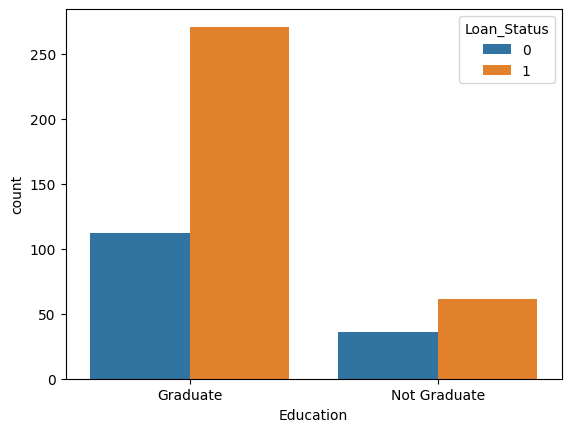

In [21]:
#education and loan status
sns.countplot(x='Education',hue = 'Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

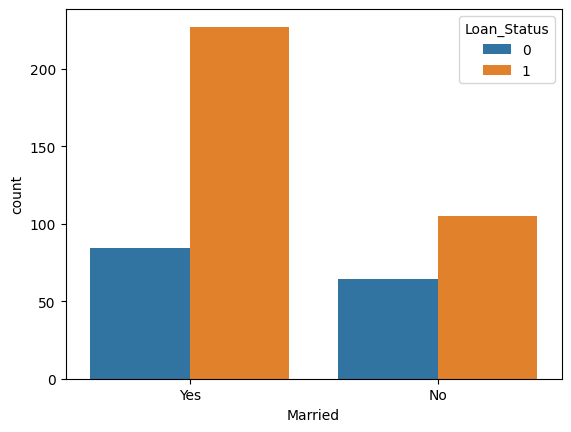

In [23]:
#marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

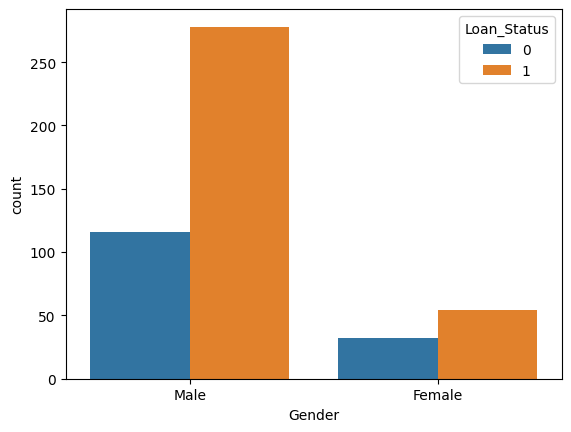

In [24]:
#gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

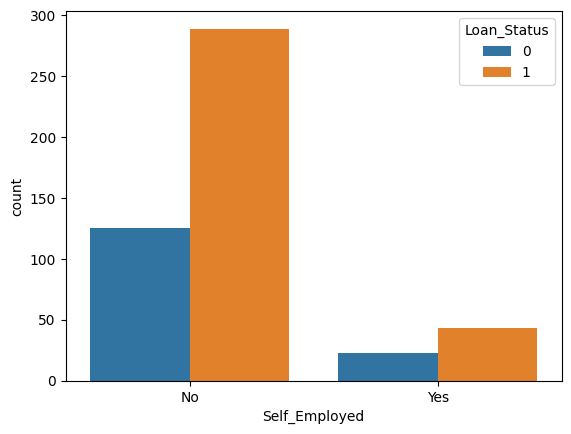

In [26]:
#Self_Employed and loan status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [41]:
#convert categorical columns to numercial values
df.replace({'Married':{'No':0,'Yes':1},
                 'Gender' : {'Male' : 1,'Female':0},
                 'Self_Employed' : {'Yes' : 1,'No':0},
                 'Property_Area' : {'Rural' : 0,'Semiurban':1,'Urban' : 2},
                 'Education' : {'Graduate' : 1,'Not Graduate':0}},inplace = True)

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [44]:
#seaparating the data and label
X = df.drop(columns = ['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train test split

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,stratify = Y,random_state = 2)

In [51]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(480, 11) (432, 11) (48, 11) (432,) (48,)


Support Vector Machine Model SVM Model -> training

In [52]:
classifier = svm.SVC(kernel='linear')
#training the SVM model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

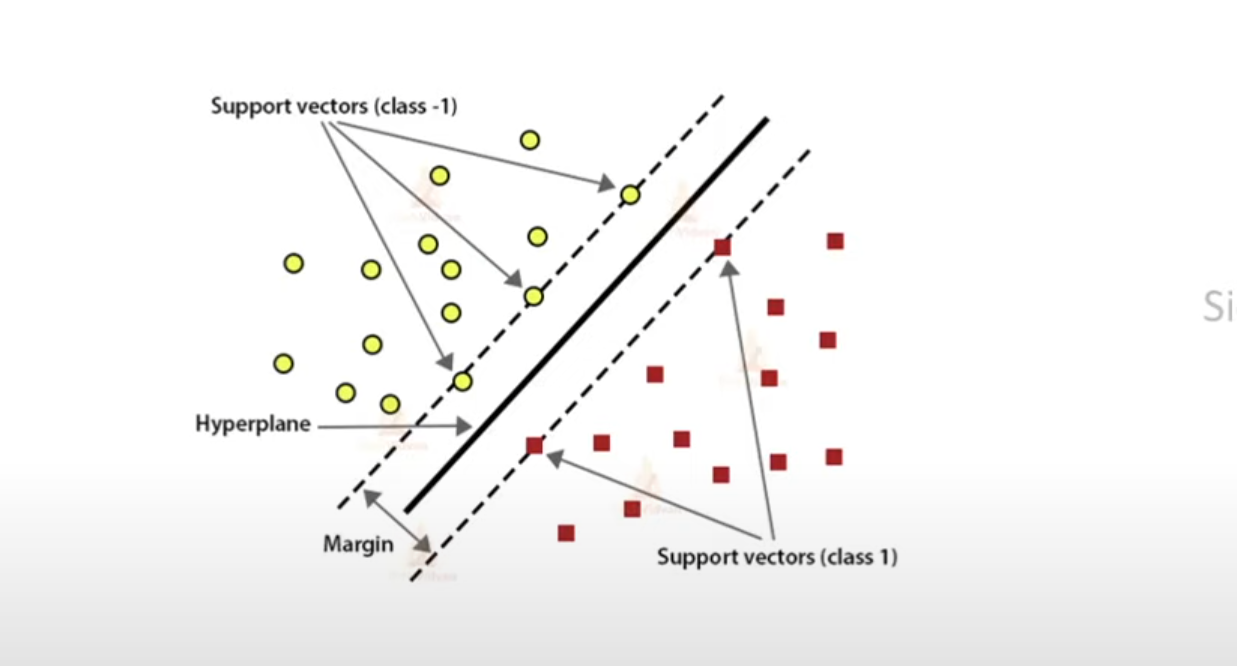

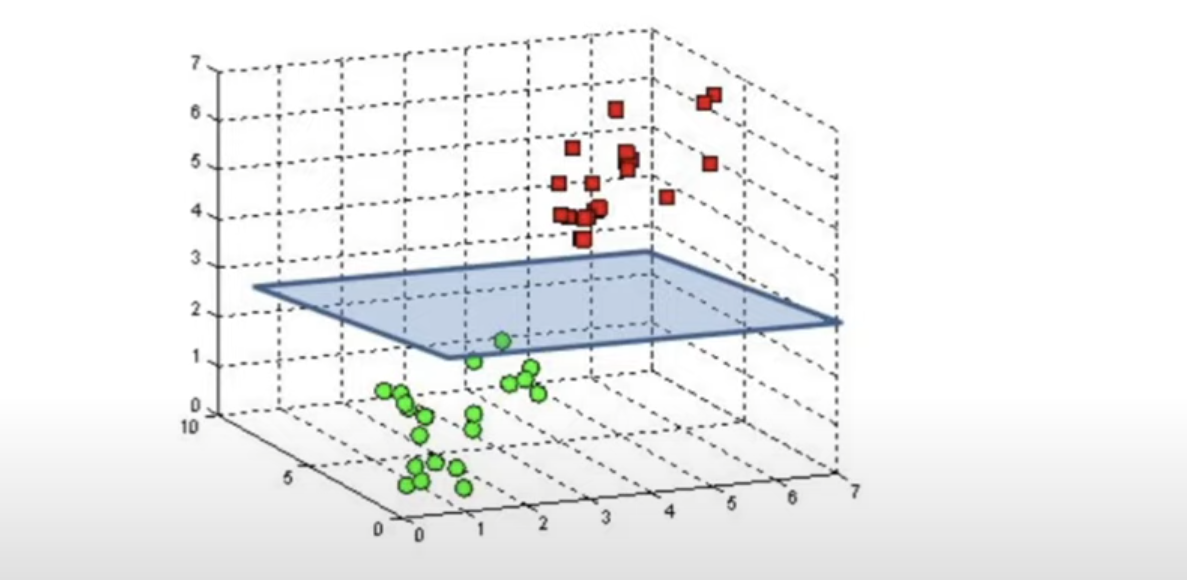

Evaluation of model

In [59]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_acc = accuracy_score(X_train_prediction,Y_train)
training_data_acc_precent = round(training_data_acc *100,2)
print('The accuracy of model on training data is ',training_data_acc_precent,'%')

The accuracy of model on training data is  79.86 %


In [63]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
testing_data_acc_precent = round(test_data_accuracy *100,2)
print('The accuracy of model on testing data is ',testing_data_acc_precent,'%')

The accuracy of model on testing data is  83.33 %


Making a predictive system

In [70]:
input_data1 = (1,	1,	2,	1,	1,	5417,	4196.0,	267.0	,360.0,	1.0,	2	)



#changing the input data to a numpy array
data1 = np.asarray(input_data1)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = data1.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person will not get loan🥲🥲')
else:
  print('The person will get laon🤩🤩')



[1]
The person will get laon🤩🤩


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
